In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
spy=yf.download('SPY',start='2010-01-01',end='2022-12-20')
index=spy.index
spy.reset_index(inplace=True)
spy

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,112.769997,112.800003,111.389999,111.440002,86.024246,90637900
1,2010-01-04,112.370003,113.389999,111.510002,113.330002,87.483208,118944600
2,2010-01-05,113.260002,113.680000,112.849998,113.629997,87.714760,111579900
3,2010-01-06,113.519997,113.989998,113.430000,113.709999,87.776535,116074400
4,2010-01-07,113.500000,114.330002,113.180000,114.190002,88.147072,131091100
...,...,...,...,...,...,...,...
3260,2022-12-13,410.220001,410.489990,399.070007,401.970001,395.740204,123782500
3261,2022-12-14,401.609985,405.500000,396.309998,399.399994,393.209991,108111300
3262,2022-12-15,394.299988,395.250000,387.890015,389.630005,383.591431,117705900
3263,2022-12-16,385.179993,386.579987,381.040009,383.269989,379.062683,119858000


In [3]:
#short_side
inpos=0
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    ma=spy.Close.iloc[i-200:i].mean()
    if inpos==0 and ma<price:
        inpos=1
        entry=price
        print('Enter Long',entry)
        
    elif inpos==1 and ma>price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('Exit Long:',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)
        
    if inpos==0 and ma>price:
        inpos=-1
        entry=price
        print('Enter short',price,pnl*100)
        
    elif inpos==-1 and ma<price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('exit short',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)

Enter Long 118.27999877929688
Exit Long: 125.48999786376953 6.095704395403374
Enter short 125.48999786376953 6.095704395403374
exit short 128.6300048828125 -2.502197045577866
Enter Long 128.60000610351562
Exit Long: 125.5 -2.4105800593977404
Enter short 125.5 -2.4105800593977404
exit short 127.87999725341797 -1.8964121541179033
Enter short 123.16000366210938 -1.8964121541179033
exit short 126.7300033569336 -2.8986680648520817
Enter short 123.94999694824219 -2.8986680648520817
exit short 126.38999938964844 -1.9685377180163401
Enter Long 126.48999786376953
Exit Long: 124.83000183105469 -1.312353593762148
Enter short 124.83000183105469 -1.312353593762148
exit short 126.12000274658203 -1.0334061496476104
Enter short 125.5 -1.0334061496476104
exit short 127.5 -1.593625498007968
Enter Long 127.69999694824219
Exit Long: 128.16000366210938 0.36022453003944227
Enter short 128.16000366210938 0.36022453003944227
exit short 129.07000732421875 -0.7100527747397517
Enter Long 131.97000122070312
Exit 

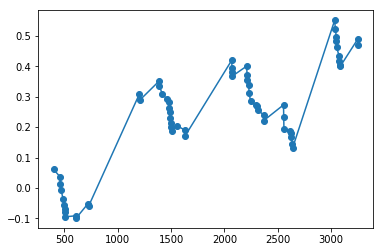

In [4]:
plt.plot(dates,np.cumsum(pnls),'-o')

In [5]:
#short_side
inpos=0
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    ma=spy.Close.iloc[i-200:i].mean()
    if inpos==0 and ma<price:
        inpos=1
        entry=price
        print('Enter Long',entry)
        
    elif inpos==1 and ma>price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('Exit Long:',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)
        
    if inpos==0 and ma>price:
        inpos=-1
        entry=price
        print('Enter short',price,pnl*100)
        
    elif inpos==-1 and ((price-entry)/entry*inpos>0.01 or ma<price):
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('exit short',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)

Enter Long 118.27999877929688
Exit Long: 125.48999786376953 6.095704395403374
Enter short 125.48999786376953 6.095704395403374
exit short 120.26000213623047 4.167659428296974
Enter short 120.08000183105469 4.167659428296974
exit short 112.26000213623047 6.512324763141232
Enter short 117.4800033569336 6.512324763141232
exit short 112.29000091552734 4.41777518990847
Enter short 117.33000183105469 4.41777518990847
exit short 114.51000213623047 2.403477073907133
Enter short 112.63999938964844 2.403477073907133
exit short 109.93000030517578 2.4058940866096132
Enter short 112.33999633789062 2.4058940866096132
exit short 128.6300048828125 -14.500631187422867
Enter Long 128.60000610351562
Exit Long: 125.5 -2.4105800593977404
Enter short 125.5 -2.4105800593977404
exit short 122.0 2.788844621513944
Enter short 123.98999786376953 2.788844621513944
exit short 127.87999725341797 -3.137349348067949
Enter short 123.16000366210938 -3.137349348067949
exit short 119.66000366210938 2.84183167905896
Enter

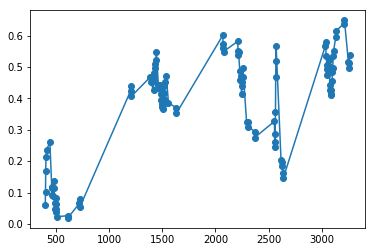

In [6]:
plt.plot(dates,np.cumsum(pnls),'-o')

In [7]:
#short_side
inpos=0
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    ma=spy.Close.iloc[i-200:i].mean()
    ma_m1=spy.Close.iloc[i-201:i-1].mean()
    if inpos==0 and ma<price:
        inpos=1
        entry=price
        print('Enter Long',entry)
        
    elif inpos==1 and ma>price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('Exit Long:',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)
        
    if inpos==0 and ma_m1<spy.Close.iloc[i-1] and ma>price:
        inpos=-1
        entry=price
        print('Enter short',price,pnl*100)
        
    elif inpos==-1 and ((price-entry)/entry*inpos>0.04 or ma<price):
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('exit short',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)

Enter Long 118.27999877929688
Exit Long: 125.48999786376953 6.095704395403374
Enter short 125.48999786376953 6.095704395403374
exit short 120.26000213623047 4.167659428296974
Enter Long 128.6300048828125
Exit Long: 125.5 -2.433339628389247
Enter short 125.5 -2.433339628389247
exit short 127.87999725341797 -1.8964121541179033
Enter short 123.16000366210938 -1.8964121541179033
exit short 116.55999755859375 5.358887550558055
Enter Long 126.7300033569336
Exit Long: 123.94999694824219 -2.1936450209517866
Enter short 123.94999694824219 -2.1936450209517866
exit short 126.38999938964844 -1.9685377180163401
Enter Long 126.48999786376953
Exit Long: 124.83000183105469 -1.312353593762148
Enter short 124.83000183105469 -1.312353593762148
exit short 126.12000274658203 -1.0334061496476104
Enter short 125.5 -1.0334061496476104
exit short 127.5 -1.593625498007968
Enter Long 127.69999694824219
Exit Long: 128.16000366210938 0.36022453003944227
Enter short 128.16000366210938 0.36022453003944227
exit short

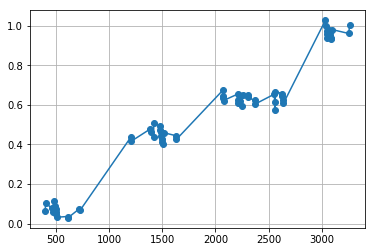

In [8]:
plt.plot(dates,np.cumsum(pnls),'-o')
plt.grid()